# CAP 5768 - Data Science - Dr. Marques - Fall 2019

Christian Garbin

# Assignment 1: The Python data science stack 

### Goals 

- To get acquainted with Python and Jupyter notebooks.
- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured as a game, with three levels of increasing complexity.
- For each level, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 320 (plus up to 44 bonus points), distributed as follows: Level 1 (82 pts), Level 2 (70+ pts), Level 3 (132+ pts) and Conclusions (36 pts).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc. 

------------
## Level 1: Presidents of the USA

The Python code below will load a dataset containing the names of the first 44 presidents of the USA and their heights, available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
file = 'data/president_heights.csv'
presidents = pd.read_csv(file) 
presidents.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [3]:
presidents.dtypes

order          int64
name          object
height(cm)     int64
dtype: object

## Your turn! (8 points)

Write code to display the histogram (4 pts) of president's heights and compute summary statistics (4 pts): 

- Mean height
- Standard deviation
- Minimum height, and 
- Maximum height.

## Solution

In [4]:
# To make life a bit simpler and consistent
p = presidents
HEIGHT = 'height(cm)'

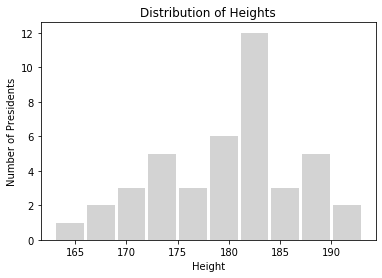

In [5]:
plt.hist(p[HEIGHT], color='lightgrey', rwidth=0.9)
plt.title('Distribution of Heights')
plt.xlabel('Height')
plt.ylabel('Number of Presidents');
plt.show()

In [6]:
print('Mean height:        {:6.2f} cm'.format(p[HEIGHT].mean()))
print('Standard deviation: {:6.2f} cm'.format(p[HEIGHT].std()))
print('Minimum height:        {} cm'.format(p[HEIGHT].min()))
print('Maximum height:        {} cm'.format(p[HEIGHT].max()))

Mean height:        179.74 cm
Standard deviation:   7.02 cm
Minimum height:        163 cm
Maximum height:        193 cm


## Your turn! (18 points)

Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):

1. Who was(were) the tallest president(s)?
2. Who was(were) the shortest president(s)?
3. How many presidents were 6' tall or taller?

## Solution

In [7]:
def president_names(p):
    return ', '.join(str(x) for x in p['name'])

print('\nTallest president(s):  {}'.format(president_names(p[p[HEIGHT] == p[HEIGHT].max()])))
print('\nShortest president(s): {}'.format(president_names(p[p[HEIGHT] == p[HEIGHT].min()])))
print('\nPresidents >= 6\':      {}'.format(president_names(p[p[HEIGHT] >= 6*30.48])))


Tallest president(s):  Abraham Lincoln, Lyndon B. Johnson

Shortest president(s): James Madison

Presidents >= 6':      George Washington, Thomas Jefferson, James Monroe, Andrew Jackson, John Tyler, James Buchanan, Abraham Lincoln, James A. Garfield, Chester A. Arthur, Warren G. Harding, Franklin D. Roosevelt, John F. Kennedy, Lyndon B. Johnson, Gerald Ford, Ronald Reagan, George H. W. Bush, Bill Clinton, Barack Obama


-------------

This is an extremely small, simple and manageable dataset. 

Let's use it to prove a silly hypotheses, for example: 

"H1: Even-numbered presidents are, in average, taller than odd-numbered ones." 

## Your turn! (24 points)

Write Python code to test hypothesis H1.

In [8]:
even = (p['order'] % 2) == 0
mean_even = p[even][HEIGHT].mean()
mean_odd = p[~even][HEIGHT].mean()

print('Mean height of even-numbered presidents: {:.2f} cm'.format(mean_even))
print('Mean height of odd-numbered presidents:  {:.2f} cm'.format(mean_odd))

even_taller = mean_even > mean_odd
print('Even-numbered presidents are {}'.format('taller' if even_taller else 'shorter'))
print('H1 is {}'.format(even_taller))

Mean height of even-numbered presidents: 179.60 cm
Mean height of odd-numbered presidents:  179.86 cm
Even-numbered presidents are shorter
H1 is False


## Question 1 (4 points)

Was hypothesis H1 confirmed or refuted?

## Solution

H1 was refuted.

---------------------

Now it's time for you to come up with a different (but also silly) hypotheses, which we will call H2. **Be creative!**

H2: The Bushes, in average, are taller than the Roosevelts.

## Your turn! (28 points)

Write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not).

## Solution

In [9]:
bushes = p['name'].str.endswith('Bush')
roosevelts = p['name'].str.endswith('Roosevelt')

bushes_mean = p[bushes][HEIGHT].mean()
roosevelts_mean = p[roosevelts][HEIGHT].mean()

print('Mean height of Bushes ({}): {:.2f}'.format(president_names(p[bushes]), bushes_mean))
print('Mean height of Roosevelts ({}): {:.2f}'.format(president_names(p[roosevelts]), roosevelts_mean))

bushes_taller = bushes_mean > roosevelts_mean
print('Bush presidents are {}'.format('taller' if bushes_taller else 'shorter'))
print('H2 is {}'.format(bushes_taller))

Mean height of Bushes (George H. W. Bush, George W. Bush): 185.00
Mean height of Roosevelts (Theodore Roosevelt, Franklin D. Roosevelt): 183.00
Bush presidents are taller
H2 is True


H2 is confirmed

-------------------
## Level 2: HR payroll

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [10]:
salaries = pd.read_csv('data/salaries.csv') 
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


## Question 2 (6 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

## Solution

(ENTER YOUR ANSWER HERE)

Some data exploration first, to understand the columns.

In [11]:
print(salaries.dtypes)
display(salaries.head(5))

earn      float64
height    float64
sex        object
ed          int64
age         int64
race       object
dtype: object


,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


* `earn`: yearly salary or total compensation (unclear) in US dollars (guess, based on the numbers)
* `height`: person's height in inches (apparently converted from another unit, because of the precision)
* `sex`: person's genre
* `ed`: years of education completed
* `age`: age in full years
* `race`: person's race

--------------------

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [12]:
salary = np.array(salaries['earn'])
print("Salary statistics")
print("Minimum salary (global):", np.min(salary))
print("Maximum salary (global):", np.max(salary))
print("Average salary (global):", np.mean(salary))
print("Median  salary (global):", np.median(salary))

Salary statistics
Minimum salary (global): 200.0
Maximum salary (global): 200000.0
Average salary (global): 23154.773489932886
Median  salary (global): 20000.0


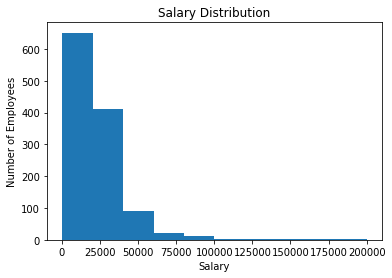

In [13]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

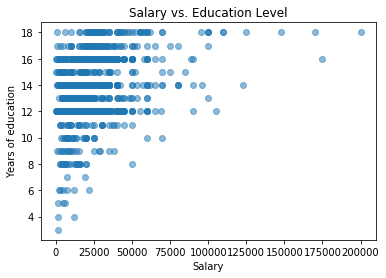

In [14]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.xlabel('Salary')
plt.ylabel('Years of education');
plt.scatter(salary, years, alpha=0.5)
plt.show()

In [15]:
# Compute Pearson coefficient
from scipy.stats import pearsonr
corr, _ = pearsonr(salary, years)
print('Correlation coefficient: ', corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

## Your turn! (16+ points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (4 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (12 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 16 bonus points)


## Solution

### 1. Total headcount, number and % by genre

In [16]:
female = salaries['sex'] == 'female'
male = ~female # shorthand and avoids bugs

count_females = len(salaries[female])
count_males = len(salaries[male])
count_all = len(salaries)
assert((count_females + count_males) == count_all)

print('Out of {} employees, there are {} ({:.2f}%) females and {} ({:.2f}%) males'
      .format(count_all, count_females, count_females/count_all*100, count_males, count_males/count_all*100))

Out of 1192 employees, there are 687 (57.63%) females and 505 (42.37%) males


### 2. Min. max, average and median salary per gender

In [17]:
def print_salary_stats(genre_name, genre_filter):
    print('\nSalary stats for {} employees'.format(genre_name))

    s = salaries[genre_filter]['earn']
    print('Minimum salary: {:7,.0f}'.format(s.min()))
    print('Maximum salary: {:7,.0f}'.format(s.max()))
    print('Average salary: {:7,.0f}'.format(s.mean()))
    print('Median  salary: {:7,.0f}'.format(s.median()))

print_salary_stats('female', female)
print_salary_stats('male', male)


Salary stats for female employees
Minimum salary:     200
Maximum salary: 123,000
Average salary:  18,280
Median  salary:  15,000

Salary stats for male employees
Minimum salary:   1,000
Maximum salary: 200,000
Average salary:  29,786
Median  salary:  25,000


### 3. Graphs for insights into gender inequality

As a general rule, we should expect salary to be correlated to years of education (and other factors - but we don't have those in this data set).

The graph below plots the salaries by year of education, split by genre.

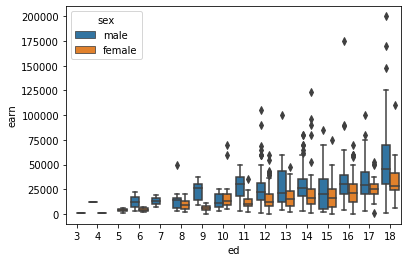

In [18]:
sns.boxplot(data=salaries, x='ed', y='earn', hue='sex')

The average salary for males is consistently higher than the average salary for females in all levels of education (some more than others). Moreover, the upper quartile is also higher.

Putting it together, there are signs of sexism in the salaries. However, we are missing other important variables, such as years of experience. This graph should be used as a starting point for more data collection, not for a conclusion (just yet).

Since we don't have years of experience in this dataset, we will use age as a proxy for now.

First will will group the ages into groups of ten years each.

In [19]:
salaries['agegroup'] = pd.cut(x=salaries['age'], bins=[19, 29, 39, 49, 59, 69, 79, 89, 99])

Then we will bin the salaries as preparation for a histogram chart. The number of bins is somewhat arbitrary. The intention is to have enough bins to see a disribution. The upper range was adjusted by hand, to avoid outliers that would compress the graph.

In [20]:
bins = np.linspace(np.min(salaries['earn']), 100000, 50)

Now we can graph the age groups by genre, side-by-side to compare them.

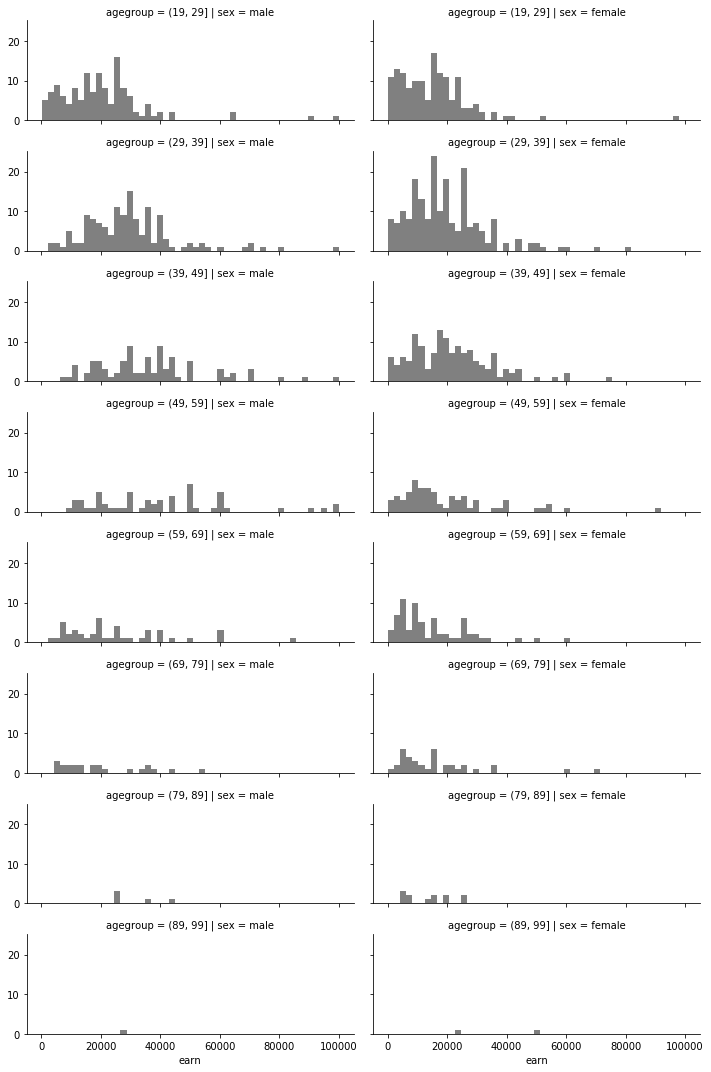

In [21]:
g = sns.FacetGrid(salaries, col='sex', row='agegroup')
g.fig.set_figheight(15)
g.fig.set_figwidth(10)
g.map(plt.hist, 'earn', bins=bins, color='grey')

Although the number of samples in each category is small to be conclusive, the graphs show that female salaries are skewed towards lower values in each age group. It is more pronounced in the prime earning ages of 29 to 59.

This is not yet conclusive because age is only a proxy for work experience. Not everyone of the same age has the same work experience and that likely affects females more, since they usually carry the burden of child rearing by staying at home for a few years (and that, in itself, is also sexism, but of a societal degree now, not only work related).

--------------------

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, height. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------

At this point, formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as ageism. 

Call these hypotheses H3, H4, and H5. 

**Be creative, but realistic! These should be reasonable hypotheses, not silly ones!**

## Your turn! (48+ points)

Write Python code to test hypotheses H3, H4, and H5 (and some text to explain whether they were confirmed or not). Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. (16 pts per hypothesis with additional <= 8 bonus points per hypotheses).  

## Solution

### H3 Ageism: older employees are paid less

The hypothesis is that older employees are paid less.

A somewhat arbitrary "older than 50 years of age" was used as the cutoff to declare someone "old" for this exercise.

NOTE: we are assuming years of education should be an indication of salary level.

Step 1: add a column that defines who is "old" for this analsys. This will simplify the remainder of the code.

In [22]:
# change this line to use a different cutoff
salaries['old'] = salaries['age'] > 50

Step 2: check the presence of a correlation between "old" and salary.

In [23]:
corr, _ = pearsonr(salaries['earn'], salaries['old'])
print('Correlation coefficient: ', corr)

Correlation coefficient:  -0.02093080543693867


This results in a very small negative correlation, almost neglible.

A quick check on other variables:

In [24]:
g = salaries.groupby('old')
g.agg(np.mean)

,earn,height,ed,age
old,,,,
False,23391.564534,67.166282,13.755331,33.663300
True,22453.840532,66.171780,12.760797,64.215947


Nothing seems to jump out in other variables that could point to ageism.

**Conclusion**: with the (somewhat arbritary) cutoff age of 50, the available data does not indicate age discrimination.

### H4 Gender bias: females are paid less

The hypothesis is that female employees are paid less. This is similar to the graph analysis done in the previouos section, but now we will do it with numbers only.

NOTE: we are assuming years of education should be an indication of salary level.

Step 1: check the presence of a correlation between genre and salary.

Because genre is categorical, we cannot directly calculate a correlation coefficient with `pearsonr`. We will first convert the categories into ordinals (it works here because we have only two categories).

In [25]:
salaries['sex_number'] = (salaries['sex'] == 'female').astype(int)

corr, _ = pearsonr(salaries['earn'], salaries['sex_number'])
print('Correlation coefficient: ', corr)

Correlation coefficient:  -0.2921021854657078


This results in a moderate correlation (see [table 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/)) between genre and salary, with female earning less.

A quick check on other variables:

In [26]:
g = salaries.groupby('sex')
g.agg(np.mean)

,earn,height,ed,age,old,sex_number
sex,,,,,,
female,18280.195051,64.605603,13.436681,42.259098,0.264920,1.0
male,29786.130693,70.057058,13.596040,40.180198,0.235644,0.0


The table shows that other variables are within the same range for male and female. Given that the average education level is essentially the same for both genres (we are assuming there should be a correlation between education and salary) and average age is also about the same, we can conclude that we have indications of genre discrimination.

**Conclusion**: the data we have indicate there may be genre discrimination. However, it's not a strong correlation. Based on this result, the next action would be to collect and analyze other important factors (for example years of experience, hours worked per month, etc.).

### H5 Race bias: non-whites are paid less

The hypothesis is that non-white employees are paid less.

NOTE: we are assuming years of education should be an indication of salary level.

Step 1: add a column to split race in two group, white and non-white. It will be added as an ordinal to let us use Pearson correlation coefficient later.

In [27]:
salaries['non-white'] = (salaries['race'] != 'white').astype(int)

Step 2: check the presence of a correlation between the new column and salary.

In [28]:
corr, _ = pearsonr(salaries['earn'], salaries['non-white'])
print('Correlation coefficient: ', corr)

Correlation coefficient:  -0.0825210949221862


This results is a neglible correlation (see [table 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/)).

A quick check on other variables:

In [29]:
g = salaries.groupby('non-white')
g.agg(np.mean)

,earn,height,ed,age,old,sex_number
non-white,,,,,,
0,23882.469161,67.055796,13.551062,41.736097,0.256825,0.574317
1,19609.497537,66.229958,13.275862,39.635468,0.231527,0.586207


Nothing seems to jump out in other variables that could point to discrimination.

**Conclusion**: the available data does not indicate race discrimination.

-------------------
## Level 3: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model. 

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [30]:
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [31]:
# Check if we have in the local cache first
import os.path
mpg_location = 'data/auto-mpg.data-original'
if not os.path.isfile(mpg_location):
    mpg_location = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'

data = pd.read_csv(mpg_location,
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

(406, 9)


In [32]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Question 3 (6 points)

What was the net effect of the line of code

``data.dropna(inplace=True)``?

## Solution

In [33]:
data.shape

(392, 9)

Fourteen rows were removed from the dataframe, no column was removed. The removed rows are the ones that have missing data, as defined [in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

## Your turn! (18+ points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (12 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (6 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 4 points)


## Solution

### 1. Three- and five-cylinder cars

In [34]:
three_cylinder = data['cylinders'] == 3
five_cylinder = data['cylinders'] == 5

print('There are {} 3-cylinder and {} 5-cylinder cars'.format(len(data[three_cylinder]), len(data[five_cylinder])))

# Store in a new data set and check we aren't making a mistake with the filters
cars = data[~(three_cylinder | five_cylinder)]
assert((len(cars) + len(data[three_cylinder]) + len(data[five_cylinder])) == len(data))

There are 4 3-cylinder and 3 5-cylinder cars


### 2. Min, max, average fuel consumption by number of cylinders

In [35]:
c = cars.groupby('cylinders')
c.agg([np.min, np.max, np.mean])['mpg']

,amin,amax,mean
cylinders,,,
4.0,18.0,46.6,29.283920
6.0,15.0,38.0,19.973494
8.0,9.0,26.6,14.963107


### 3. Most and least fuel efficient vehicles

In [36]:
def car_names(p):
    return ', '.join(str(x) for x in p['car_name'])

c = cars # shorthand
print('Most fuel efficient car(s):   {}'.format(car_names(c[c['mpg'] == c['mpg'].max()])))
print('Least fuel efficient car(s):  {}'.format(car_names(c[c['mpg'] == c['mpg'].min()])))

Most fuel efficient car(s):   mazda glc
Least fuel efficient car(s):  hi 1200d


--------------------

This dataset may help us test hypotheses and answer questions related to fuel consumption. 

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

## Your turn! (48 points)

Write Python code to plot the relationship between:

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


## Solution

### 1. Fuel consumption and displacement relationship

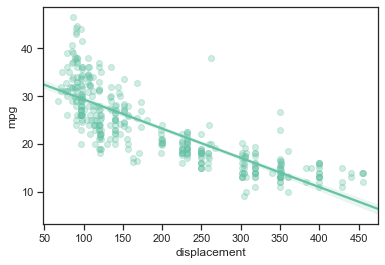

In [37]:
sns.regplot(data=cars, x='displacement', y='mpg', scatter_kws={'alpha':0.3})

### 2. Fuel consumption and weight

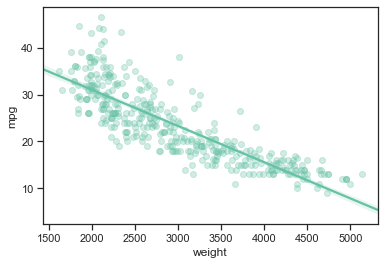

In [38]:
sns.regplot(data=cars, x='weight', y='mpg', scatter_kws={'alpha':0.3})

### 3. Fuel consumption and horsepower (HP)

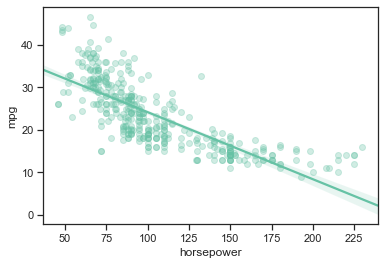

In [39]:
sns.regplot(data=cars, x='horsepower', y='mpg', scatter_kws={'alpha':0.3})

## Questions 4-6 (30 points, i.e. 10 points each)

For each of the three cases above, use the plots to answer the questions below:

4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?
5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?
6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?



## Solution

### 4. Is there a correlation between mpg and displacement? If so: is it positive or negative? linear or non-linear?

Yes, there is a linear, negative correlation betwen mpg and displacement.

### 5. Is there a correlation between mpg and weight? If so: is it positive or negative? linear or non-linear?

Yes, there is a linear, negative correlation betwen mpg and weight.

### 6. Is there a correlation between mpg and horsepower? If so: is it positive or negative? linear or non-linear?

Yes, there is a linear, negative correlation betwen mpg and horsepower.

Although there are two indications that it may not be linear in all ranges:

* As the horsepower increases (the right side of the regression line), the samples are far from the line. It's also visible in the larger confidence interval shown in that part of the line.
* On the lower side of horsepower, using alpha in the graph shows that the samples tend to cluster above and below the linear regression line.

The graph below uses a second-order polynomial fitting curve, which seems to model the data better.

We need more data to be sure. With what we have, the best we can say is that for the most part the relationship is linear.

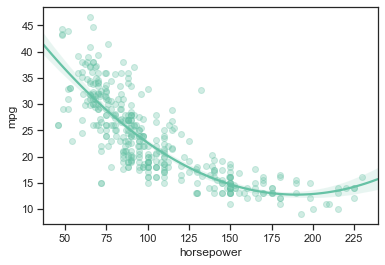

In [40]:
sns.regplot(data=cars, x='horsepower', y='mpg', order=2, scatter_kws={'alpha':0.3})

## Questions 7-8 (30 points, i.e. 15 points each)

Write Python code to produce (box)plots that should provide good answers the questions below:

7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?
8. Are Japanese cars more fuel efficient than American or European ones?

Hint: 

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



## Solution

### 7. Did vehicles get more efficient over the years (represented in this dataset, i.e., 1970 through 1982)?

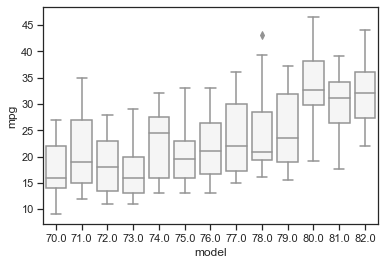

In [41]:
sns.boxplot(data=cars, x='model', y='mpg', color='whitesmoke')

The plot shows that car did get more efficient over the years.

Not only the average is (generally) going up, but the lower quartile(s) are going up as well. This results in even the least efficient cars in recent years being more efficient than the average car of past years.

### 8. Are Japanese cars more fuel efficient than American or European ones?

In [42]:
# Make a copy because we will change it (so far it's a view of the original dataframe)
cars = cars.copy()
cars['country'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

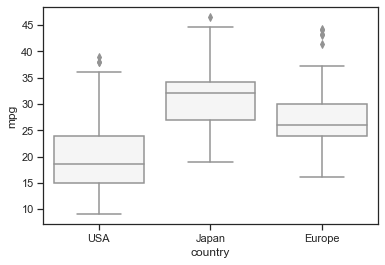

In [43]:
sns.boxplot(data=cars, x='country', y='mpg', color='whitesmoke')

Yes, Japanese cars are more efficient than American or European ones, when measured by average fuel consumption. They are also more efficient in general, as shown in the quartiles of the boxplot.

## Conclusions (36 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

### What have you learned from this assignment?

Technical things I learned:

* A better understanding of JupyterLab and its extensions. Found two extensions that made me more productive.
* The details of NumPy/Pandas broadcast operations. It was black magic to me before that.
* Experimented more with Pandas aggregation functions.
* Learned how to create groups of data with `cut()`.

Conceptual things I learned:

* Strategies to compare multi-categorical data, such as plotting boxplots in the same graph and using multiple plots to compare categories within categories (e.g. by sex and age group).


### Which parts were the most fun, time-consuming, enlightening, tedious?

Fun:

* Playing with different graph formats
* Learning how to aggregrate data
* Learning how to bin data
* Play with colors and alpha in graphs :)

Time-consuming

* Multi-categorical plotting, but mainly because I decided to go that route

Enlightening

* The power of data aggregration in Pandas - how much can be done with one line of code

Tedious

* None

### What would you do if you had an additional week to work on this?

* Better format for the graphs, e.g. color scheme and size (some of them could be made larger), remove boxes around the graphs, etc.
* Learn more techniques to compare multi-categorical data, like the salaries example, where we have two genres to compare and analyze across different variables.
* Read the questions more carefully to understand how we are supposed to answer the question, saving me from submitting the assignment so many times to fix what I missed in a first reading :O